In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/GUVICLASS/OLA_DataSet.xlsx')
df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/6839/68...
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date                        103024 non-null  datetime64[ns]
 1   Time                        103024 non-null  object        
 2   Booking_ID                  103024 non-null  object        
 3   Booking_Status              103024 non-null  object        
 4   Customer_ID                 103024 non-null  object        
 5   Vehicle_Type                103024 non-null  object        
 6   Pickup_Location             103024 non-null  object        
 7   Drop_Location               103024 non-null  object        
 8   V_TAT                       63967 non-null   float64       
 9   C_TAT                       63967 non-null   float64       
 10  Canceled_Rides_by_Customer  10499 non-null   object        
 11  Canceled_Rides_by_Driver    18434 non-n

In [ ]:
df.shape

(103024, 20)

In [ ]:
# EDA

In [ ]:
df.describe()

,Date,V_TAT,C_TAT,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating
count,103024,63967.000000,63967.000000,103024.000000,103024.000000,63967.000000,63967.000000
mean,2024-07-16 11:31:38.879678720,170.876952,84.873372,548.751883,14.189927,3.997457,3.998313
min,2024-07-01 00:00:00,35.000000,25.000000,100.000000,0.000000,3.000000,3.000000
25%,2024-07-08 18:41:00,98.000000,55.000000,242.000000,0.000000,3.500000,3.500000
50%,2024-07-16 11:23:00,168.000000,85.000000,386.000000,8.000000,4.000000,4.000000
75%,2024-07-24 05:18:00,238.000000,115.000000,621.000000,26.000000,4.500000,4.500000
max,2024-07-31 23:58:00,308.000000,145.000000,2999.000000,49.000000,5.000000,5.000000
std,NaN,80.803640,36.005100,536.541221,15.776270,0.576834,0.578957


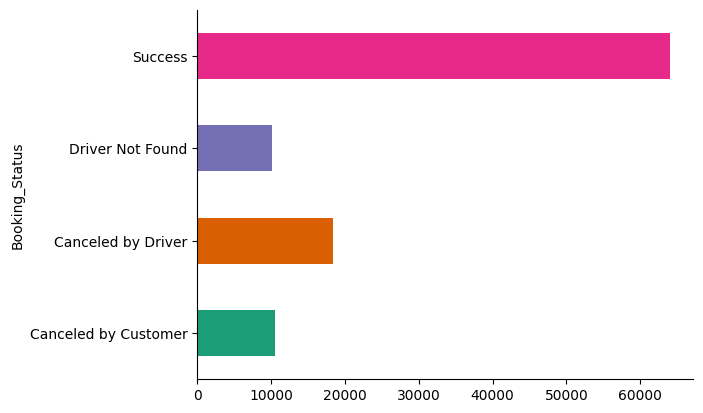

In [ ]:
df.groupby('Booking_Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

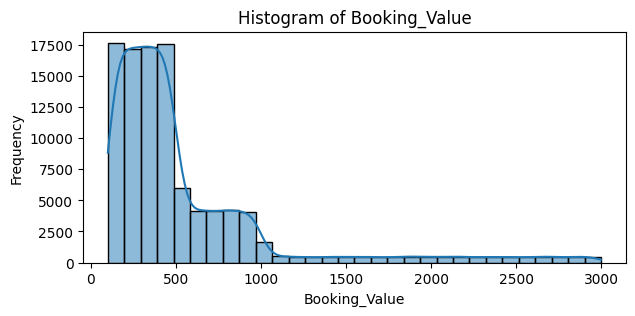

In [ ]:
plt.figure(figsize = (7,3))
sns.histplot(df['Booking_Value'], bins = 30, kde = True)
plt.title('Histogram of Booking_Value')
plt.xlabel('Booking_Value')
plt.ylabel('Frequency')
plt.show()

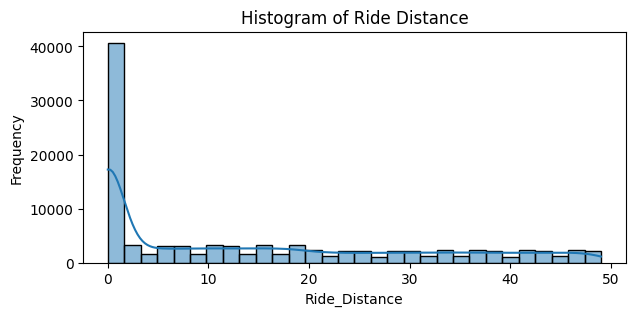

In [ ]:
plt.figure(figsize = (7,3))
sns.histplot(df['Ride_Distance'], bins = 30, kde = True)
plt.title('Histogram of Ride Distance')
plt.xlabel('Ride_Distance')
plt.ylabel('Frequency')
plt.show()

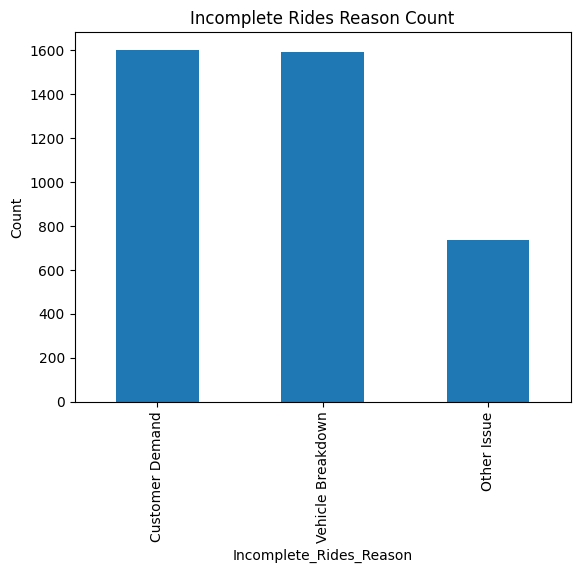

In [ ]:
df['Incomplete_Rides_Reason'].value_counts().plot(kind='bar')
plt.title('Incomplete Rides Reason Count')
plt.ylabel('Count')
plt.show()

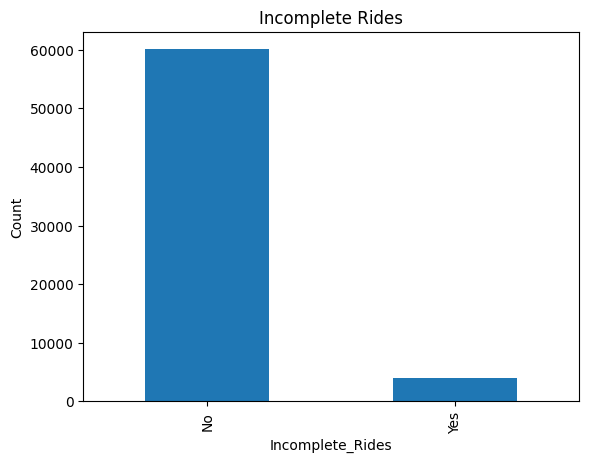

In [ ]:
df['Incomplete_Rides'].value_counts().plot(kind='bar')
plt.title('Incomplete Rides')
plt.ylabel('Count')
plt.show()

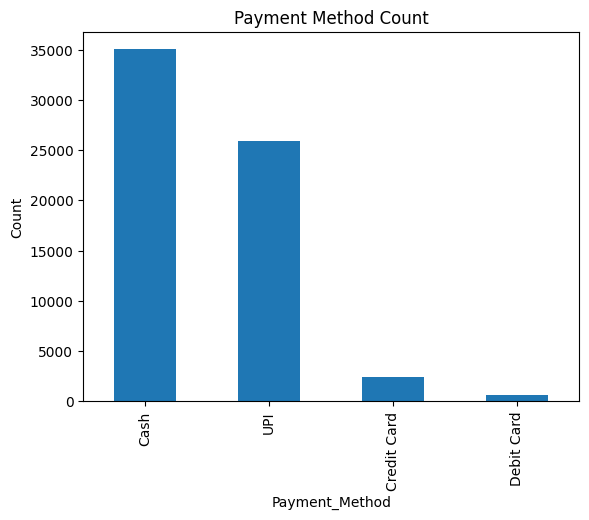

In [ ]:
df['Payment_Method'].value_counts().plot(kind='bar')
plt.title('Payment Method Count')
plt.ylabel('Count')
plt.show()

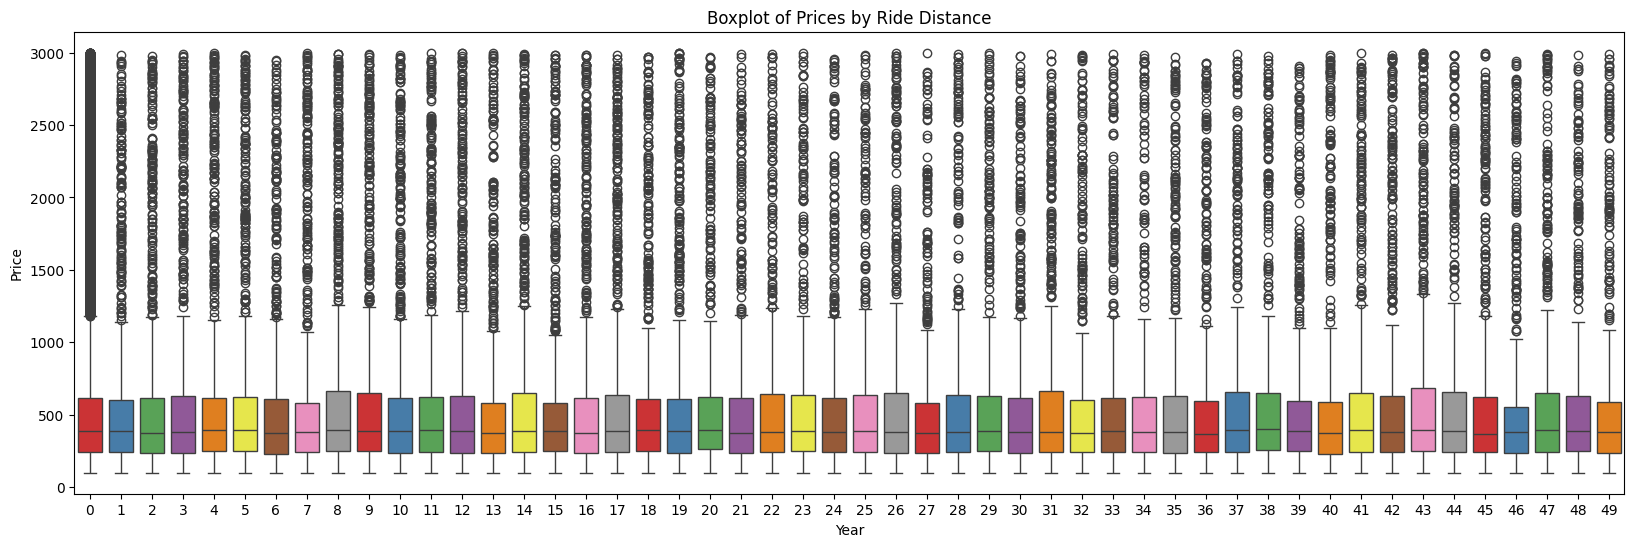

In [ ]:
# Data Visualization : Boxplot of prices by year
plt.figure(figsize = (20, 6))
sns.boxplot(x = 'Ride_Distance', y = 'Booking_Value', data = df, palette = 'Set1')
plt.title('Boxplot of Prices by Ride Distance')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

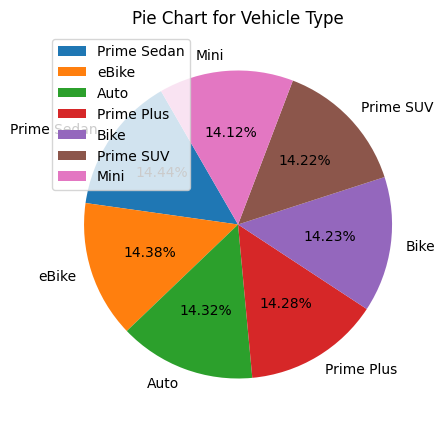

In [ ]:
# Step 13: Pie Chart for transmission types
transmission_counts = df['Vehicle_Type'].value_counts()
plt.figure(figsize = (5,5))
plt.pie(transmission_counts, labels = transmission_counts.index, autopct = '%.2f%%', startangle = 120)
plt.title('Pie Chart for Vehicle Type')
plt.legend()
plt.show()

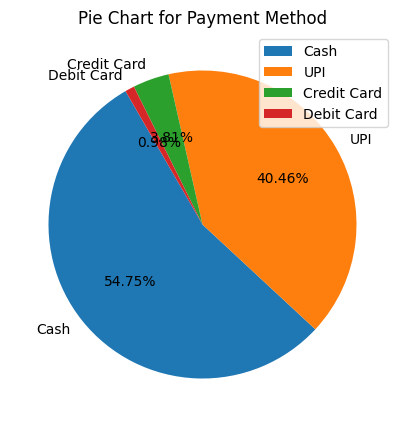

In [ ]:
# Step 13: Pie Chart for transmission types
transmission_counts = df['Payment_Method'].value_counts()
plt.figure(figsize = (5,5))
plt.pie(transmission_counts, labels = transmission_counts.index, autopct = '%.2f%%', startangle = 120)
plt.title('Pie Chart for Payment Method')
plt.legend()
plt.show()

In [ ]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols

Index(['V_TAT', 'C_TAT', 'Booking_Value', 'Ride_Distance', 'Driver_Ratings',
       'Customer_Rating'],
      dtype='object')

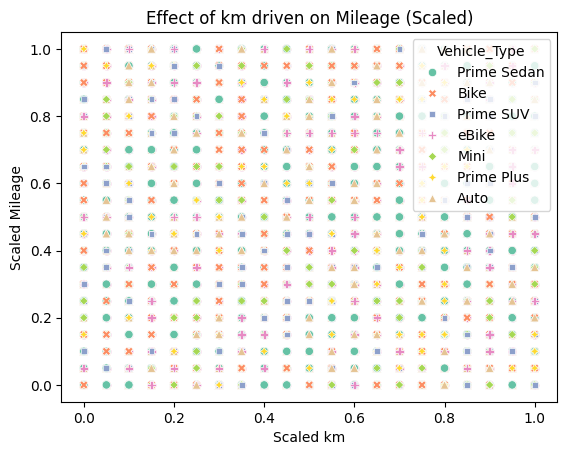

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Driver_Ratings', 'Customer_Rating']] = scaler.fit_transform(df[['Driver_Ratings', 'Customer_Rating']])

sns.scatterplot(x='Driver_Ratings', y='Customer_Rating', data=df, hue='Vehicle_Type', style='Vehicle_Type', palette='Set2')
plt.xlabel('Scaled km')
plt.ylabel('Scaled Mileage')
plt.title('Effect of km driven on Mileage (Scaled)')
plt.show()


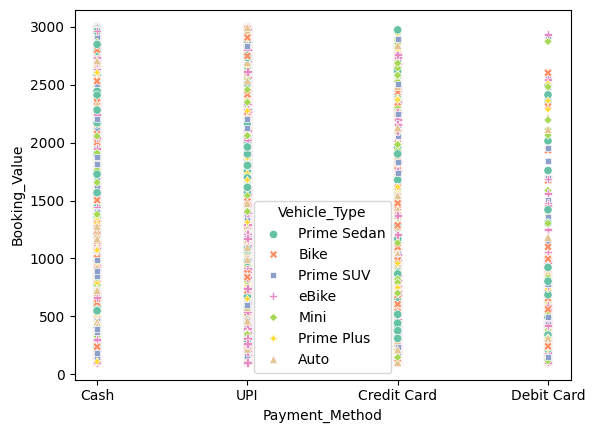

In [ ]:
sns.scatterplot(x='Payment_Method',y='Booking_Value',data=df, hue='Vehicle_Type',style='Vehicle_Type', palette='Set2')
plt.show()

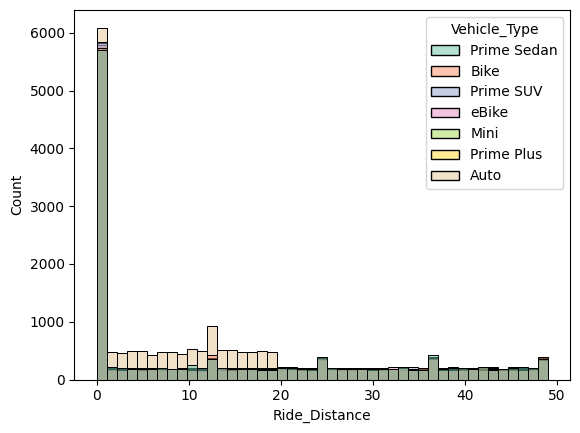

In [ ]:
sns.histplot(x='Ride_Distance',data=df,hue='Vehicle_Type',palette='Set2')
plt.show()

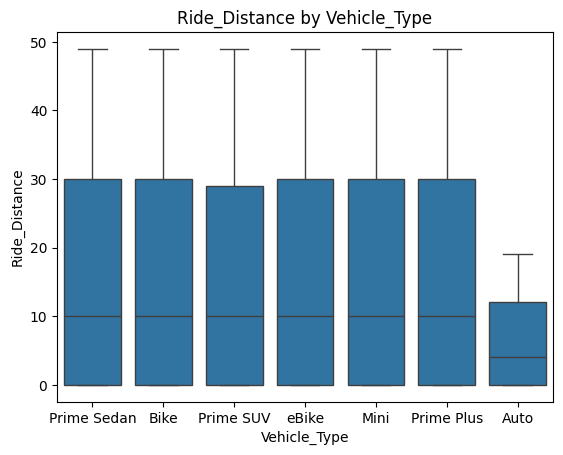

In [ ]:
sns.boxplot(x='Vehicle_Type', y='Ride_Distance', data=df,legend=False)
plt.title("Ride_Distance by Vehicle_Type")
plt.show()

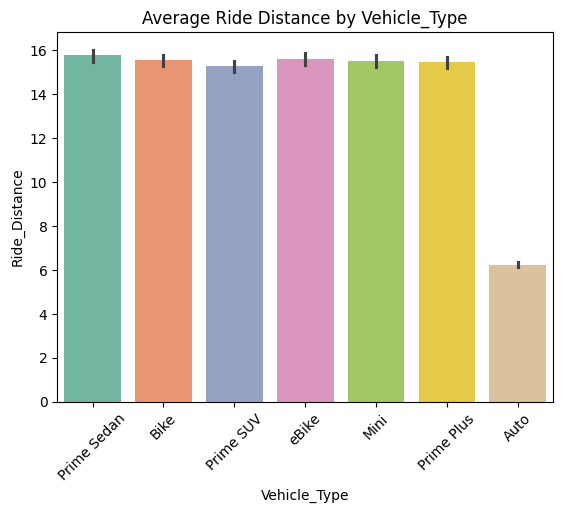

In [ ]:
sns.barplot(x='Vehicle_Type', y='Ride_Distance', data=df, palette='Set2', estimator=np.mean)
plt.title("Average Ride Distance by Vehicle_Type")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Checking if the data is having missing values or not
df.isnull().sum().any()

np.True_

In [ ]:
#checking column wise sum of the missing values in the data
df.isnull().sum()

,0
Date,0
Time,0
Booking_ID,0
Booking_Status,0
Customer_ID,0
Vehicle_Type,0
Pickup_Location,0
Drop_Location,0
V_TAT,39057
C_TAT,39057


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Date,V_TAT,C_TAT,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating
count,103024,63967.000000,63967.000000,103024.000000,103024.000000,63967.000000,63967.000000
mean,2024-07-16 11:31:38.879678720,170.876952,84.873372,548.751883,14.189927,3.997457,3.998313
min,2024-07-01 00:00:00,35.000000,25.000000,100.000000,0.000000,3.000000,3.000000
25%,2024-07-08 18:41:00,98.000000,55.000000,242.000000,0.000000,3.500000,3.500000
50%,2024-07-16 11:23:00,168.000000,85.000000,386.000000,8.000000,4.000000,4.000000
75%,2024-07-24 05:18:00,238.000000,115.000000,621.000000,26.000000,4.500000,4.500000
max,2024-07-31 23:58:00,308.000000,145.000000,2999.000000,49.000000,5.000000,5.000000
std,NaN,80.803640,36.005100,536.541221,15.776270,0.576834,0.578957


In [ ]:
df1 = df.dropna(how='any')
df1.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images


In [ ]:
df['Customer_Rating'].fillna(df['Customer_Rating'].median(), inplace=True)
df['Driver_Ratings'].fillna(df['Driver_Ratings'].median(), inplace=True)

In [ ]:
# For numerical values

In [ ]:
df['V_TAT'].fillna(df['V_TAT'].mean(), inplace=True)
df['C_TAT'].fillna(df['C_TAT'].mean(), inplace=True)

In [ ]:
# For categorical values

In [ ]:
df['Payment_Method'].fillna(df['Payment_Method'].mode()[0], inplace=True)
df['Canceled_Rides_by_Customer'].fillna(df['Canceled_Rides_by_Customer'].mode()[0], inplace=True)
df['Canceled_Rides_by_Driver'].fillna(df['Canceled_Rides_by_Driver'].mode()[0], inplace=True)
df['Incomplete_Rides'].fillna(df['Incomplete_Rides'].mode()[0], inplace=True)
df['Incomplete_Rides_Reason'].fillna(df['Incomplete_Rides_Reason'].mode()[0], inplace=True)

In [ ]:
# Checking if the data is having missing values or not
df.isnull().sum().any()

np.False_

In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
Booking_ID,0
Booking_Status,0
Customer_ID,0
Vehicle_Type,0
Pickup_Location,0
Drop_Location,0
V_TAT,0
C_TAT,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date                        103024 non-null  datetime64[ns]
 1   Time                        103024 non-null  object        
 2   Booking_ID                  103024 non-null  object        
 3   Booking_Status              103024 non-null  object        
 4   Customer_ID                 103024 non-null  object        
 5   Vehicle_Type                103024 non-null  object        
 6   Pickup_Location             103024 non-null  object        
 7   Drop_Location               103024 non-null  object        
 8   V_TAT                       103024 non-null  float64       
 9   C_TAT                       103024 non-null  float64       
 10  Canceled_Rides_by_Customer  103024 non-null  object        
 11  Canceled_Rides_by_Driver    103024 non-

In [ ]:
df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,170.876952,84.873372,Driver is not moving towards pickup location,Personal & Car related issue,No,Customer Demand,444,Cash,0,4.0,4.0,https://cdn-icons-png.flaticon.com/128/14183/1...
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.000000,30.000000,Driver is not moving towards pickup location,Personal & Car related issue,No,Customer Demand,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.000000,130.000000,Driver is not moving towards pickup location,Personal & Car related issue,No,Customer Demand,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,170.876952,84.873372,Driver is not moving towards pickup location,Personal & Car related issue,No,Customer Demand,384,Cash,0,4.0,4.0,https://cdn-icons-png.flaticon.com/128/6839/68...
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.000000,80.000000,Driver is not moving towards pickup location,Personal & Car related issue,No,Customer Demand,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...


In [ ]:
df['Payment_Method'].value_counts()

,count
Payment_Method,
Cash,74079
UPI,25881
Credit Card,2435
Debit Card,629


In [ ]:
df.to_excel("cleaned_ola_data.xlsx", index=False)

In [ ]:
from google.colab import files

In [ ]:
files.download("cleaned_ola_data.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>